 <h1><center><font size="6">Logistic Regression Using Scikit-Learn for Pima Indian Diabetes classification</font></center></h1>


<center><img src="https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg" width="600"></img></center>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Class distribution</a>
- <a href='#5'>Data preprocessing</a>
    - <a href='#51'>Selecting features</a>
    - <a href='#52'>Splitting data</a>
- <a href='#6'>Model</a>  
    - <a href='#61'>Prepare the model</a>  
    - <a href='#62'>Train the model</a>      
- <a href='#7'>Model Evaluation using confusion matrix</a>
    - <a href='#71'>Visualizing confusion matrix using heatmap</a>
    - <a href='#72'>Confusion matrix evalution metrics</a>
- <a href='#8'>ROC Curve</a>
- <a href='#9'>Advantages</a>
- <a href='#10'>Disadvantages</a>    
- <a href='#11'>Conclusion</a>

# <a id='1'>Introduction</a>

## Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



# <a id='2'>Loading packages</a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a id='3'>Read the data</a>

There are only 2 outputs 0 and 1.

* **0**: **No diabetes**
* **1**: **Yes diabetes**

In [2]:
df=pd.read_csv('diabetes.csv')

# <a id='4'>Data exploration</a>

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

## <a id='41'>Data distribution

In [ ]:
count0=0
count1=0

for i in df['Outcome']:
    if i==0:
        count0+=1
    else:
        count1+=1

print("Number of people without diabetes: ",count0)
print("Number of people with diabetes: ",count1)

# <a id='5'>Data preprocessing</a>

## <a id='51'>Selecting features</a>

In [8]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = df.drop(['Outcome'],axis=1) # Features
y = df.drop(feature_cols,axis=1) # Target variable

## <a id='52'>Splitting data</a>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

# <a id='6'>Model</a>



In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# <a id=7>Model evaluation using confusion matrix</a>

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.

## <a id='71'>Visvualizing confusion matric  using heatmap</a>

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



## <a id='72'>Confusion matrix evaluation metrics</a>

In [ ]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

Well, you got a classification rate of 82%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 82% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 61% of the time.

# <a id='8'>ROC Curve</a>

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

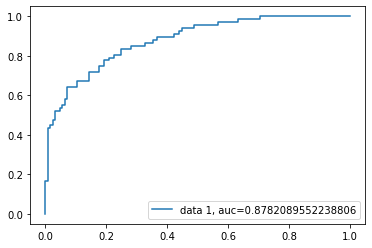

In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

# <a id='9'>Advantages</a>

Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

# <a id='10'>Disadvantages</a>

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

# <a id='10'>Conclusion</a>

you covered a lot of details about Logistic Regression. You have learned what logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.

Hopefully, you can now utilize the Logistic Regression technique to analyze your own datasets. Thanks for reading this tutorial!